# Introducing Scikit-Learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns; sns.set()

## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

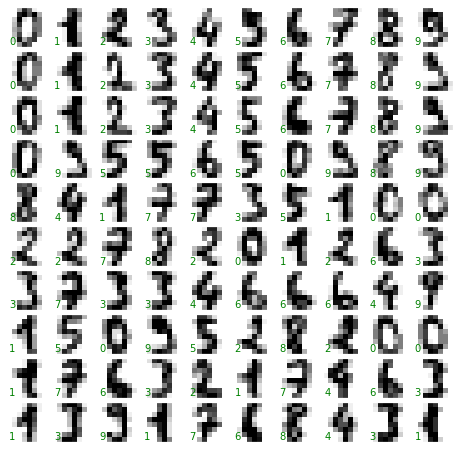

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

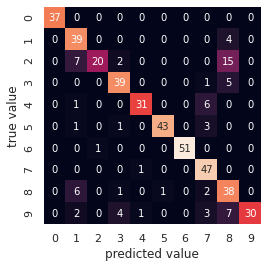

In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [10]:
print(mat)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

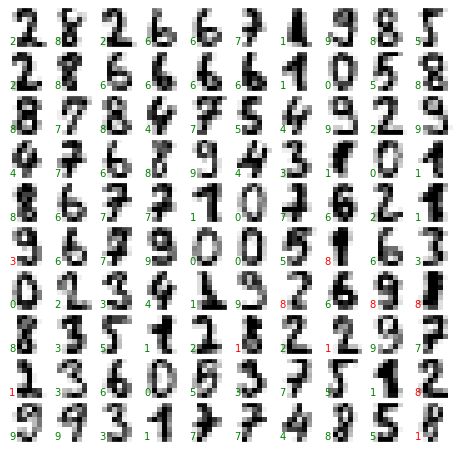

In [11]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

## Summary

In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API.
Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.